In [51]:
import zipfile
import os

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Example usage:
zip_file_path = "/content/drive/MyDrive/newexample (2).zip"
extracted_folder_path = "/content/"

unzip_file(zip_file_path, extracted_folder_path)

In [52]:
#Required import statements

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow.keras.applications
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [53]:
# Define the input shape for the model.
# 224 x 224 pixels with 3 color channels (RGB).
input_shape = (224, 224, 3)

In [54]:
# Define the path to the directory containing the training dataset.
train_directory = '/content/newexample/train'

# Define the path to the directory containing the testing dataset.
test_directory = '/content/newexample/test'

# Define the path to the directory containing the validation dataset.
val_directory = '/content/newexample/valid'


In [55]:
# Define the input layer for the model.
# 'input_shape' specifies the shape of the input data that the model expects.
inputs = Input(shape=input_shape)

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the input layer
inputs = Input(shape=(224, 224, 3))

# First Convolutional Layer
x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# Second Convolutional Layer
x = Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# Third Convolutional Layer
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu')(x)

# Fourth Convolutional Layer
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu')(x)

# Fifth Convolutional Layer
x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# Flatten the output from the previous layer
x = Flatten()(x)

# Fully Connected Layers
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)
outputs = Dense(units=10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 384)       8851

In [57]:
# useful for getting the number of classes
folders = glob('/content/newexample/train/*')

# Number of Classes
num_classes = len(folders)

# Model Compilation
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Data Preprocessing for Testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Data Generator
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

# Testing Data Generator
test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Print Number of Batches for Training and Testing
print(len(training_set))
print(len(test_set))

# Model Training
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Found 1601 images belonging to 10 classes.
Found 403 images belonging to 10 classes.
51
13
Epoch 1/50
51/51 [==============================] - 25s 431ms/step - loss: 2.4565 - accuracy: 0.1131 - val_loss: 2.2921 - val_accuracy: 0.1092
Epoch 2/50
51/51 [==============================] - 21s 402ms/step - loss: 2.1825 - accuracy: 0.1768 - val_loss: 2.1217 - val_accuracy: 0.1935
Epoch 3/50
51/51 [==============================] - 24s 464ms/step - loss: 2.0014 - accuracy: 0.2630 - val_loss: 1.9177 - val_accuracy: 0.3275
Epoch 4/50
51/51 [==============================] - 21s 418ms/step - loss: 1.8165 - accuracy: 0.3223 - val_loss: 1.6809 - val_accuracy: 0.3598
Epoch 5/50
51/51 [==============================] - 23s 443ms/step - loss: 1.7932 - accuracy: 0.3385 - val_loss: 1.6332 - val_accuracy: 0.4045
Epoch 6/50
51/51 [==============================] - 20s 397ms/step - loss: 1.6964 - accuracy: 0.3773 - val_loss: 1.5360 - val_accuracy: 0.4516
Epoch 7/50
51/51 [==============================] -

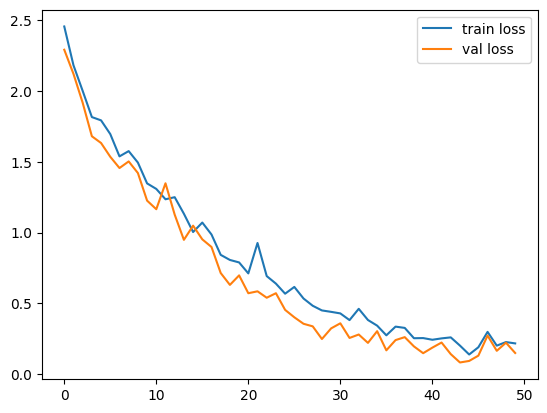

In [60]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

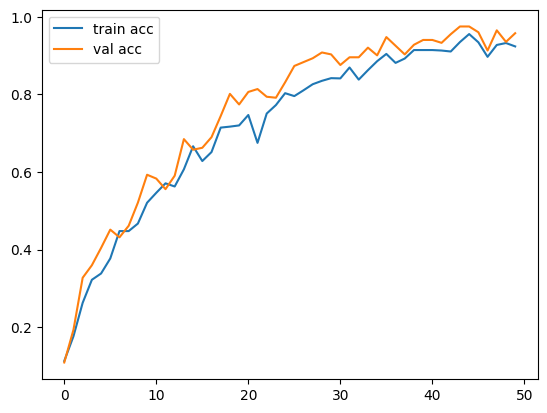

In [61]:
# Accuracy Plot
plt.plot(r.history['accuracy'], label='train acc')

# Check if validation accuracy exists in the history
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

# Save the Model
model.save('Alexnet.h5')


In [62]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array

# Load the pre-trained model
model1 = load_model('./Alexnet.h5', compile=False)

# Get the class indices from the training data generator
lab = training_set.class_indices

# Reverse the class indices to get a dictionary with class names as keys and indices as values
lab = {k: v for v, k in lab.items()}


In [63]:
def output(location):
    # Load and preprocess the image from the given location
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255  # Normalize pixel values to be between 0 and 1
    img = np.expand_dims(img, [0])  # Add a batch dimension to the image

    # Make predictions using the loaded model
    answer = model1.predict(img)

    # Get the class index with the highest probability
    y_class = answer.argmax(axis=-1)

    # Convert the class index to an integer and get the corresponding class name
    y = int(y_class)
    res = lab[y]

    # Return the predicted class name
    return res


In [64]:
# Image File Path
img='D:/D Downloads/data set/10_birdspecies__dataset/test/AZURE JAY/1.jpg'
# Load and Display the Image
pic=load_img('D:/D Downloads/data set/10_birdspecies__dataset/test/AZURE JAY/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/D Downloads/data set/10_birdspecies__dataset/test/AZURE JAY/1.jpg'